# NijiEN Fanbase Overlap

Data science project by Gloria Kao, aka @kiwiww76 on Twitter

# Introduction

Nijisanji is a famous VTuber agency company based in Japan, with an increasingly popular overseas branch known as Nijisanji EN, which is the focus of this project. The **goal of this project** is to see **which Nijisanji EN livers are most likely to have overlapping fanbases/fandoms.**


# Data Collection

Data was collected anonymously via a Google Forms survey that was posted on Twitter and Discord. A total of 586 people responded. 

Link: https://docs.google.com/forms/d/1gMNT0HyneWkzDIBwqEfKzx28BDqZXWnKGWroTk0r-6Y/edit

Five questions were asked:
1. `Who is our oshi(s)?` - checkboxes question (select multiple)
2. `Gender` - multiple choice question
3. `Age` - integer entered by the respondent
4. `Time zone` (in UTC) - multiple choice question
5. `Are you native/fluent in English?` - Yes/No question


# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/Nijisanji EN Fanbase Overlap Survey.csv')
data

,Timestamp,Who is your oshi(s)?,Gender,Age,Time zone,Are you native/fluent in English?
0,2023/05/21 12:52:12 AM MDT,Vox Akuma;Uki Violeta;Fulgur Ovid,NaN,NaN,UTC -5,Yes
1,2023/05/21 12:55:26 AM MDT,Luca Kaneshiro;Shu Yamino;Ike Eveland;Mysta Ri...,NaN,20.0,UTC +8,Yes
2,2023/05/21 12:57:57 AM MDT,Elira Pendora;Selen Tatsuki;Millie Parfait;Luc...,NaN,NaN,UTC +14/-10,Yes
3,2023/05/21 12:58:43 AM MDT,Uki Violeta;Fulgur Ovid,NaN,23.0,UTC -7,Yes
4,2023/05/21 1:00:21 AM MDT,Fulgur Ovid,NaN,34.0,UTC +7,No
...,...,...,...,...,...,...
581,2023/06/15 11:51:27 PM MDT,Selen Tatsuki;Sonny Brisko;Kotoka Torahime,Non-binary,26.0,UTC +8,Yes
582,2023/06/15 11:54:59 PM MDT,Elira Pendora;Finana Ryugu;Rosemi Lovelock;Sel...,Non-binary,20.0,UTC -7,Yes
583,2023/06/16 11:07:13 AM MDT,Luca Kaneshiro;Shu Yamino;Mysta Rias;Sonny Bri...,Female,18.0,UTC +8,Yes
584,2023/06/18 10:36:18 PM MDT,Shu Yamino;Sonny Brisko;Alban Knox;Ren Zotto;D...,Female,25.0,UTC +7,No


In [3]:
data.dtypes

Timestamp                             object
Who is your oshi(s)?                  object
Gender                                object
Age                                  float64
Time zone                             object
Are you native/fluent in English?     object
dtype: object

In [4]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

C:\Users\glori\AppData\Roaming\Python\Python311\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname MDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\glori\AppData\Local\Temp\ipykernel_21988\652119658.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Timestamp'] = pd.to_datetime(data['Timestamp'])


In [5]:
# timestamp is like the ID, every one is unique
data['Timestamp'].unique()

<DatetimeArray>
['2023-05-21 00:52:12', '2023-05-21 00:55:26', '2023-05-21 00:57:57',
 '2023-05-21 00:58:43', '2023-05-21 01:00:21', '2023-05-21 01:01:19',
 '2023-05-21 01:07:59', '2023-05-21 01:09:49', '2023-05-21 01:10:25',
 '2023-05-21 01:14:09',
 ...
 '2023-06-14 05:26:21', '2023-06-14 11:36:41', '2023-06-14 13:13:06',
 '2023-06-14 17:33:42', '2023-06-14 18:24:57', '2023-06-15 23:51:27',
 '2023-06-15 23:54:59', '2023-06-16 11:07:13', '2023-06-18 22:36:18',
 '2023-06-19 11:01:01']
Length: 586, dtype: datetime64[ns]

### Cleaning the "oshis" column

Each liver has their own column. Each row represents a respondent, and if they oshi a liver, then `True` for that colum, else `False`.

In [6]:
oshis_list = data['Who is your oshi(s)?'].str.split(';')
oshis_count = []
for l in oshis_list:
    oshis_count.append(len(l))
data['Number of oshis'] = oshis_count
data

,Timestamp,Who is your oshi(s)?,Gender,Age,Time zone,Are you native/fluent in English?,Number of oshis
0,2023-05-21 00:52:12,Vox Akuma;Uki Violeta;Fulgur Ovid,NaN,NaN,UTC -5,Yes,3
1,2023-05-21 00:55:26,Luca Kaneshiro;Shu Yamino;Ike Eveland;Mysta Ri...,NaN,20.0,UTC +8,Yes,5
2,2023-05-21 00:57:57,Elira Pendora;Selen Tatsuki;Millie Parfait;Luc...,NaN,NaN,UTC +14/-10,Yes,8
3,2023-05-21 00:58:43,Uki Violeta;Fulgur Ovid,NaN,23.0,UTC -7,Yes,2
4,2023-05-21 01:00:21,Fulgur Ovid,NaN,34.0,UTC +7,No,1
...,...,...,...,...,...,...,...
581,2023-06-15 23:51:27,Selen Tatsuki;Sonny Brisko;Kotoka Torahime,Non-binary,26.0,UTC +8,Yes,3
582,2023-06-15 23:54:59,Elira Pendora;Finana Ryugu;Rosemi Lovelock;Sel...,Non-binary,20.0,UTC -7,Yes,18
583,2023-06-16 11:07:13,Luca Kaneshiro;Shu Yamino;Mysta Rias;Sonny Bri...,Female,18.0,UTC +8,Yes,7
584,2023-06-18 22:36:18,Shu Yamino;Sonny Brisko;Alban Knox;Ren Zotto;D...,Female,25.0,UTC +7,No,5


In [7]:
livers = [
    'Pomu Rainpuff',
    'Elira Pendora', 
    'Finana Ryugu',
    'Rosemi Lovelock',
    'Petra Gurin',
    'Selen Tatsuki',
    'Nina Kosaka',
    'Millie Parfait',
    'Enna Alouette',
    'Reimu Endou',
    'Luca Kaneshiro',
    'Shu Yamino',
    'Ike Eveland',
    'Mysta Rias',
    'Vox Akuma',
    'Sonny Brisko',
    'Uki Violeta',
    'Alban Knox',
    'Fulgur Ovid',
    'Maria Marionette',
    'Kyo Kaneko',
    'Aia Amare',
    'Aster Arcadia',
    'Scarle Yonaguni',
    'Ren Zotto',
    'Doppio Dropscythe',
    'Meloco Kyoran',
    'Hex Haywire',
    'Kotoka Torahime',
    'Ver Vermillion'
]

In [8]:
# each row represents one fan and their oshis
oshis = data['Who is your oshi(s)?']
counts_dict = {}
for liver in livers:
    counts_dict[liver] = oshis.str.contains(liver)
    
oshis_df = pd.DataFrame(counts_dict)
oshis_df

,Pomu Rainpuff,Elira Pendora,Finana Ryugu,Rosemi Lovelock,Petra Gurin,Selen Tatsuki,Nina Kosaka,Millie Parfait,Enna Alouette,Reimu Endou,...,Kyo Kaneko,Aia Amare,Aster Arcadia,Scarle Yonaguni,Ren Zotto,Doppio Dropscythe,Meloco Kyoran,Hex Haywire,Kotoka Torahime,Ver Vermillion
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
582,False,True,True,True,False,True,False,False,True,True,...,False,True,True,False,True,True,True,True,False,True
583,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
584,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False


In [9]:
# merging the two df 
data = data.merge(oshis_df, left_index=True, right_index=True)
data = data.drop('Who is your oshi(s)?', axis=1)
data

,Timestamp,Gender,Age,Time zone,Are you native/fluent in English?,Number of oshis,Pomu Rainpuff,Elira Pendora,Finana Ryugu,Rosemi Lovelock,...,Kyo Kaneko,Aia Amare,Aster Arcadia,Scarle Yonaguni,Ren Zotto,Doppio Dropscythe,Meloco Kyoran,Hex Haywire,Kotoka Torahime,Ver Vermillion
0,2023-05-21 00:52:12,NaN,NaN,UTC -5,Yes,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2023-05-21 00:55:26,NaN,20.0,UTC +8,Yes,5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2023-05-21 00:57:57,NaN,NaN,UTC +14/-10,Yes,8,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
3,2023-05-21 00:58:43,NaN,23.0,UTC -7,Yes,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2023-05-21 01:00:21,NaN,34.0,UTC +7,No,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,2023-06-15 23:51:27,Non-binary,26.0,UTC +8,Yes,3,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
582,2023-06-15 23:54:59,Non-binary,20.0,UTC -7,Yes,18,False,True,True,True,...,False,True,True,False,True,True,True,True,False,True
583,2023-06-16 11:07:13,Female,18.0,UTC +8,Yes,7,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
584,2023-06-18 22:36:18,Female,25.0,UTC +7,No,5,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False


### Cleaning the "gender" column

Question number 2 (gender) was added later after some people had already filled out the survey, so there are a lot of missing values. We will not imputate (replace) the missing values because that would be making up false data.

In [10]:
data['Gender'].value_counts()

Gender
Female                      97
Non-binary                  27
Male                        15
I dont even know anymore     1
Bigender                     1
Genderfluid                  1
bigender                     1
Prefer not to answer         1
Demigirl                     1
Name: count, dtype: int64

In [11]:
# the 3 main genders are: female, non-binary, and male
# replace the other responses with "other"
# leave NaN as is

def standardize_gender(string):
    if type(string) == float:
        output = 'Unknown'
    elif string not in {'Female', 'Non-binary', 'Male'}:
        output = 'Other'
    else:
        output = string
    return output

data['Gender'] = data['Gender'].apply(standardize_gender)
data

,Timestamp,Gender,Age,Time zone,Are you native/fluent in English?,Number of oshis,Pomu Rainpuff,Elira Pendora,Finana Ryugu,Rosemi Lovelock,...,Kyo Kaneko,Aia Amare,Aster Arcadia,Scarle Yonaguni,Ren Zotto,Doppio Dropscythe,Meloco Kyoran,Hex Haywire,Kotoka Torahime,Ver Vermillion
0,2023-05-21 00:52:12,Unknown,NaN,UTC -5,Yes,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2023-05-21 00:55:26,Unknown,20.0,UTC +8,Yes,5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2023-05-21 00:57:57,Unknown,NaN,UTC +14/-10,Yes,8,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
3,2023-05-21 00:58:43,Unknown,23.0,UTC -7,Yes,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2023-05-21 01:00:21,Unknown,34.0,UTC +7,No,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,2023-06-15 23:51:27,Non-binary,26.0,UTC +8,Yes,3,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
582,2023-06-15 23:54:59,Non-binary,20.0,UTC -7,Yes,18,False,True,True,True,...,False,True,True,False,True,True,True,True,False,True
583,2023-06-16 11:07:13,Female,18.0,UTC +8,Yes,7,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
584,2023-06-18 22:36:18,Female,25.0,UTC +7,No,5,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False


In [12]:
data['Gender'].value_counts()

Gender
Unknown       441
Female         97
Non-binary     27
Male           15
Other           6
Name: count, dtype: int64

### Cleaning the "age" column

On the Google Forms, a person could only answer in intergers from 1-100, so there is minimal cleaning needed. 

In [13]:
# the number of nulls
data['Age'].isna().sum()

51

<Axes: xlabel='Age', ylabel='Count'>

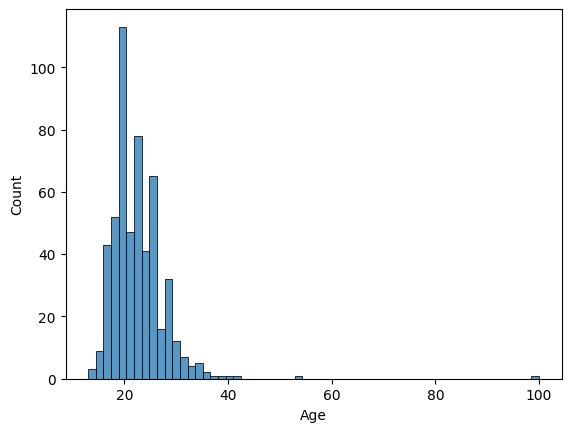

In [14]:
sns.histplot(data, x='Age')

In [15]:
# the possible maximum that a respondent could enter is 100, so this seems like a troll answer
# 100 is an outlier, but not an impossible answer either, so it will be kept
data['Age'].max()

100.0

### Cleaning the "time zone" column

The column datatype is string and includes "UTC", which is repetitive, so we will remove that.

In [16]:
data['Time zone'] = data['Time zone'].str.replace('UTC ', '')
data

,Timestamp,Gender,Age,Time zone,Are you native/fluent in English?,Number of oshis,Pomu Rainpuff,Elira Pendora,Finana Ryugu,Rosemi Lovelock,...,Kyo Kaneko,Aia Amare,Aster Arcadia,Scarle Yonaguni,Ren Zotto,Doppio Dropscythe,Meloco Kyoran,Hex Haywire,Kotoka Torahime,Ver Vermillion
0,2023-05-21 00:52:12,Unknown,NaN,-5,Yes,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2023-05-21 00:55:26,Unknown,20.0,+8,Yes,5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2023-05-21 00:57:57,Unknown,NaN,+14/-10,Yes,8,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
3,2023-05-21 00:58:43,Unknown,23.0,-7,Yes,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2023-05-21 01:00:21,Unknown,34.0,+7,No,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,2023-06-15 23:51:27,Non-binary,26.0,+8,Yes,3,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
582,2023-06-15 23:54:59,Non-binary,20.0,-7,Yes,18,False,True,True,True,...,False,True,True,False,True,True,True,True,False,True
583,2023-06-16 11:07:13,Female,18.0,+8,Yes,7,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
584,2023-06-18 22:36:18,Female,25.0,+7,No,5,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False


<Axes: xlabel='Time zone', ylabel='Count'>

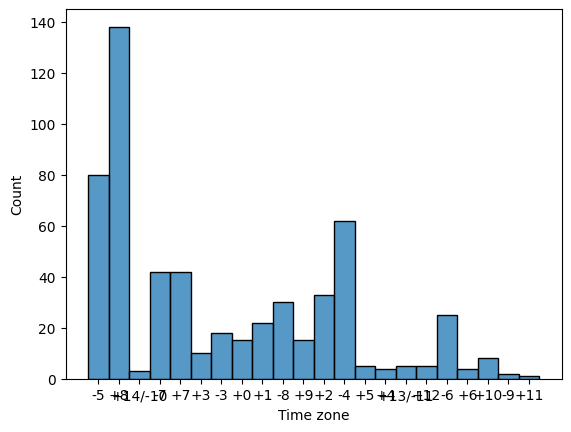

In [17]:
sns.histplot(data, x='Time zone')

The time zones rae not in order, so we would change the column datatype into numbers.

In [18]:
data['Time zone'].value_counts()

Time zone
+8         138
-5          80
-4          62
-7          42
+7          42
+2          33
-8          30
-6          25
+1          22
-3          18
+0          15
+9          15
+3          10
+10          8
+5           5
+13/-11      5
+12          5
+4           4
+6           4
+14/-10      3
-9           2
+11          1
Name: count, dtype: int64

In [19]:
def format_timezone(string):
    if type(string) == float:
        output = np.NAN
    elif '/' in string:
        output = string[-3:]
    elif '+' in string:
        output = string.replace('+', '').strip()
    else:
        output = string.strip()
    return float(output)
        

In [20]:
data['Time zone'] = data['Time zone'].apply(format_timezone)
data

,Timestamp,Gender,Age,Time zone,Are you native/fluent in English?,Number of oshis,Pomu Rainpuff,Elira Pendora,Finana Ryugu,Rosemi Lovelock,...,Kyo Kaneko,Aia Amare,Aster Arcadia,Scarle Yonaguni,Ren Zotto,Doppio Dropscythe,Meloco Kyoran,Hex Haywire,Kotoka Torahime,Ver Vermillion
0,2023-05-21 00:52:12,Unknown,NaN,-5.0,Yes,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2023-05-21 00:55:26,Unknown,20.0,8.0,Yes,5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2023-05-21 00:57:57,Unknown,NaN,-10.0,Yes,8,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
3,2023-05-21 00:58:43,Unknown,23.0,-7.0,Yes,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2023-05-21 01:00:21,Unknown,34.0,7.0,No,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,2023-06-15 23:51:27,Non-binary,26.0,8.0,Yes,3,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
582,2023-06-15 23:54:59,Non-binary,20.0,-7.0,Yes,18,False,True,True,True,...,False,True,True,False,True,True,True,True,False,True
583,2023-06-16 11:07:13,Female,18.0,8.0,Yes,7,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
584,2023-06-18 22:36:18,Female,25.0,7.0,No,5,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False


### Cleaning the "native English" column

~~The column is in "Yes/No" string format right now, and we would convert the datatype into boolean.~~

Left in "Yes/No" format for easy visualization later.

In [21]:
# def format_native_english(string):
#     if string == 'Yes':
#         output = True
#     elif string == 'No':
#         output = False
#     return output

In [22]:
data.rename(columns={'Are you native/fluent in English?': 'Native English', }, inplace=True)
# data['Native English'] = data['Native English'].apply(format_native_english)
# data

In [23]:
# all columns cleaned, save as a new file
data.to_csv('data/cleaned_data.csv', index=False)

# EDA

Now we cleaned the data, we will do some exploratory data analysis to see the general trends and also answer our big question.

Plan:
- univariate analysis -> see distribution within each column
- demographic distribution for each liver
- overlap for each liver -> heat map

In [24]:
data = pd.read_csv('data/cleaned_data.csv')
data

,Timestamp,Gender,Age,Time zone,Native English,Number of oshis,Pomu Rainpuff,Elira Pendora,Finana Ryugu,Rosemi Lovelock,...,Kyo Kaneko,Aia Amare,Aster Arcadia,Scarle Yonaguni,Ren Zotto,Doppio Dropscythe,Meloco Kyoran,Hex Haywire,Kotoka Torahime,Ver Vermillion
0,2023-05-21 00:52:12,Unknown,NaN,-5.0,Yes,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2023-05-21 00:55:26,Unknown,20.0,8.0,Yes,5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2023-05-21 00:57:57,Unknown,NaN,-10.0,Yes,8,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
3,2023-05-21 00:58:43,Unknown,23.0,-7.0,Yes,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2023-05-21 01:00:21,Unknown,34.0,7.0,No,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,2023-06-15 23:51:27,Non-binary,26.0,8.0,Yes,3,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
582,2023-06-15 23:54:59,Non-binary,20.0,-7.0,Yes,18,False,True,True,True,...,False,True,True,False,True,True,True,True,False,True
583,2023-06-16 11:07:13,Female,18.0,8.0,Yes,7,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
584,2023-06-18 22:36:18,Female,25.0,7.0,No,5,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False


### Univariate Analysis

Visualize distributions across all respondents regardless of oshi within each column variable. 

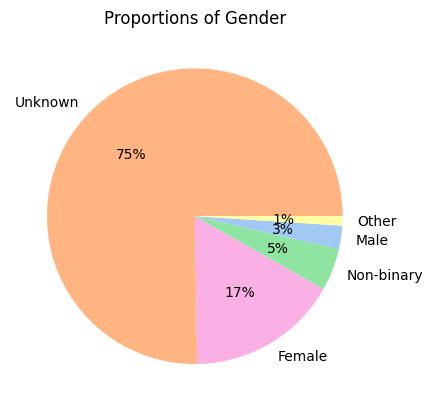

In [25]:
# pie chart for gender
colors = ['#ffb482', '#fab0e4', '#8de5a1', '#a1c9f4', '#fffea3']
ratios = data['Gender'].value_counts() / len(data)
plt.pie(ratios, labels = ['Unknown', 'Female', 'Non-binary', 'Male', 'Other'], colors = colors, autopct='%.0f%%')
plt.title('Proportions of Gender')
plt.show()

Despite that three quarters of the people not answering their question (due to reasons explained before), most NijiEN fans are female, and interestingly, more non-binary people than males. 

In [26]:
data['Age'].describe()

count    535.000000
mean      22.450467
std        5.730926
min       13.000000
25%       19.000000
50%       22.000000
75%       25.000000
max      100.000000
Name: Age, dtype: float64

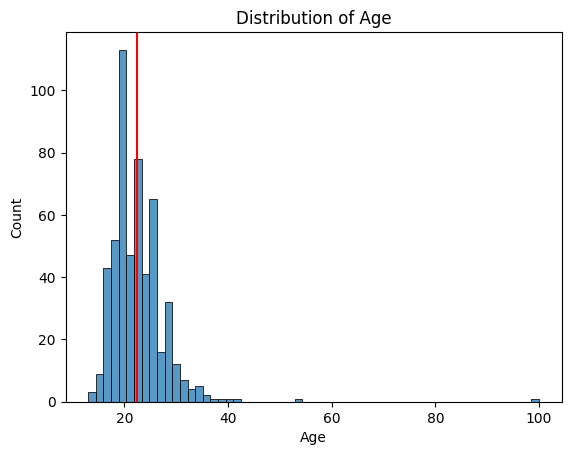

In [27]:
# histogram for age
sns.histplot(data, x='Age').set(title='Distribution of Age')
plt.axvline(data['Age'].mean(), color='red')

Most NijiEN fans are teens and young adults, with the mean at 22. 

[Text(0.5, 1.0, 'Distribution of Time Zone (in UTC)')]

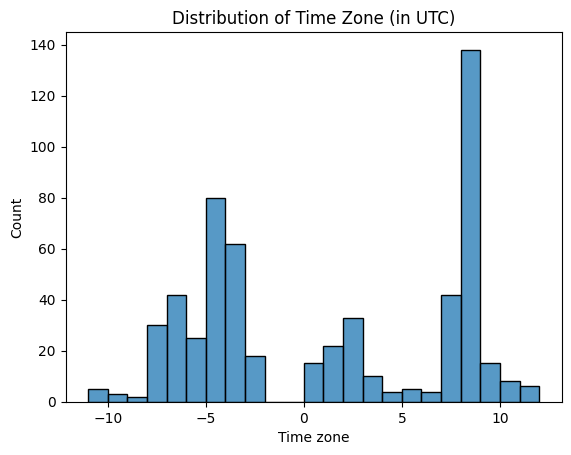

In [28]:
# histogram for time zone
sns.histplot(data, x='Time zone', binwidth=1).set(title='Distribution of Time Zone (in UTC)')

Most people are in UTC +8, which is the time zone used in all predominantly Chinese-speaking regions. This should not be a surprise if you are familiar with the VTuber community, that many viewers are in Asian time zones. The second most is UTC -4, which includes countries like Argentina, Brazil, and the eastern coast of Canada and USA. 

[Text(0.5, 1.0, 'Proportion of English Users')]

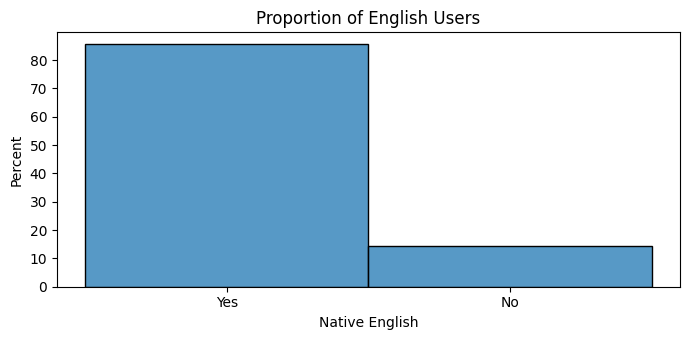

In [84]:
# bar chart for native english
sns.histplot(data, x='Native English', stat='percent').set(title='Proportion of English Users')

In the survey, native English is defined as a language you use on a near daily basis and are pretty confident about in fluency. Over 80% of the viewers are native English, which is not surprising because all livers stream primarily in English and most viewers are past a certain fluency to understand the livers clearly. However, it should not be expected that all viewers are native English. 

In [30]:
data['Number of oshis'].describe()

count    586.000000
mean       5.020478
std        3.757103
min        1.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       30.000000
Name: Number of oshis, dtype: float64

[Text(0.5, 1.0, 'Distribution of Number of Oshis')]

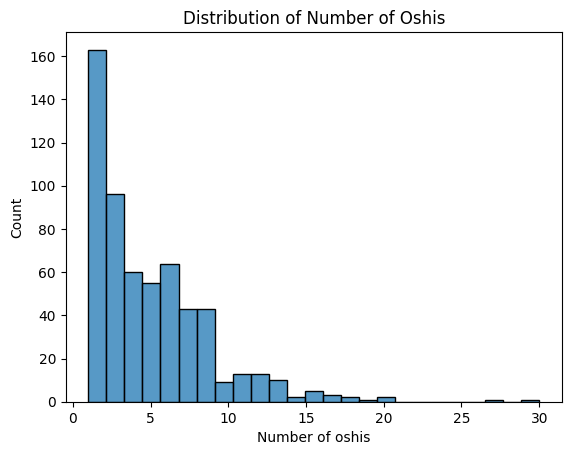

In [31]:
# histogram for number of oshis
sns.histplot(data, x='Number of oshis').set(title='Distribution of Number of Oshis')

Most respondents have 1-5 oshis, and one respondent oshis all the NijiEN livers.

### Demographic Distrubtion for each Liver

In [97]:
# functions for creating visualization for each variable
# each function takes the input of the liver's name

def vis_gender(liver):
    liver_data = data[data[liver] == True]
    colors = ['#ffb482', '#fab0e4', '#8de5a1', '#a1c9f4', '#fffea3']
    ratios = liver_data['Gender'].value_counts() / len(liver_data)
    labels = liver_data['Gender'].unique()
    fig = plt.pie(ratios, labels = labels, colors = colors, autopct='%.0f%%')
    fig = plt.title('Proportions of Gender')
    return fig
    
def vis_age(liver):
    liver_data = data[data[liver] == True]
    fig = sns.histplot(liver_data, x='Age').set(title='Distribution of Age')
    fig = plt.axvline(liver_data['Age'].mean(), color='red')
    return fig

def vis_time_zone(liver):
    liver_data = data[data[liver] == True]
    fig = sns.histplot(liver_data, x='Time zone', binwidth=1).set(title='Distribution of Time Zone (in UTC)')
    return fig
    
def vis_native_eng(liver):
    liver_data = data[data[liver] == True]
    liver_data = liver_data.sort_values(by='Native English', ascending=False)
    fig = sns.histplot(liver_data, x='Native English', stat='percent').set(title='Proportion of English Users')
    return fig

In [104]:
# create all 4 variables for one liver and save them into PDFs

def save_image(filename, figs):
    from matplotlib.backends.backend_pdf import PdfPages

    p = PdfPages(filename)
    # plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    
    for fig in figs:
        p.savefig(fig)
    p.close()

def demographic_vis(liver):
    gender = plt.figure()
    vis_gender(liver)
    age = plt.figure()
    vis_age(liver)
    time_zone = plt.figure()
    vis_time_zone(liver)
    native_eng = plt.figure()
    vis_native_eng(liver)
    
    filename = f'{liver} demographic visualization.pdf'
    fig_nums = plt.get_fignums()
    figs = [plt.figure(n) for n in fig_nums]
    save_image(filename, figs)
    plt.close('all')


In [105]:
# for liver in livers:
#     demographic_vis(liver)